In [40]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

tumor_data = pd.read_csv("data/clinicaltrial_data.csv")
tumor_data.head()

# Combine the data into a single dataset

drug_data = pd.read_csv("data/mouse_drug_data.csv")
drug_data.head()
# Display the data table for preview
drug_test = pd.merge(drug_data, tumor_data, on="Mouse ID")
drug_test.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [41]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

Tumor_group_df = drug_test.groupby(['Drug','Timepoint'])
Tumor_sem_df = pd.DataFrame(Tumor_group_df ["Tumor Volume (mm3)"].sem())
Tumor_sem_df.head()
Tumor_mean_df = pd.DataFrame(Tumor_group_df ["Tumor Volume (mm3)"].mean())
Tumor_mean_df.reset_index(inplace=True)
Tumor_mean_df.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [42]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_response_df = drug_test[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]

# Calculate mean of Tumor Volume per drug
tumor_response_df = pd.DataFrame(tumor_response_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())

tumor_response_df["Volume SEM"] = tumor_response_df['Tumor Volume (mm3)'].sem()
tumor_response_df.reset_index(inplace = True)
tumor_response_df.head()



,Drug,Timepoint,Tumor Volume (mm3),Volume SEM
0,Capomulin,0,45.000000,0.898067
1,Capomulin,5,44.266086,0.898067
2,Capomulin,10,43.084291,0.898067
3,Capomulin,15,42.064317,0.898067
4,Capomulin,20,40.716325,0.898067


In [43]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_2 = tumor_response_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  
tumor_response_2.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


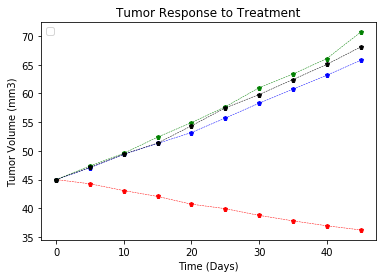

In [44]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Capomulin'],
             color='r', marker='p', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Infubinol'],
             color='b', marker='p', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Ketapril'],
             color='g', marker='p', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Placebo'],
             color='black', marker='p', markersize=5, linestyle='--', linewidth=0.5)

x_lim = len(tumor_response_pivot.index)
# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Tumor Volume (mm3)")
# legend 
plt.legend(loc='upper left')
plt.show()
# Save the Figure



In [45]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [46]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response_df = drug_test[['Drug', 'Timepoint', 'Metastatic Sites']]
metastatic_response_df = pd.DataFrame(metastatic_response_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())
# Convert to DataFrame

# Preview DataFrame


In [47]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_response_df["Metastatic Site SEM"] = metastatic_response_df['Metastatic Sites'].sem()
metastatic_response_df.reset_index(inplace = True)
metastatic_response_df.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites,Metastatic Site SEM
0,Capomulin,0,0.000000,0.090044
1,Capomulin,5,0.160000,0.090044
2,Capomulin,10,0.320000,0.090044
3,Capomulin,15,0.375000,0.090044
4,Capomulin,20,0.652174,0.090044


In [54]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_response_df2 = metastatic_response_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  
metastatic_response_df2.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


No handles with labels found to put in legend.


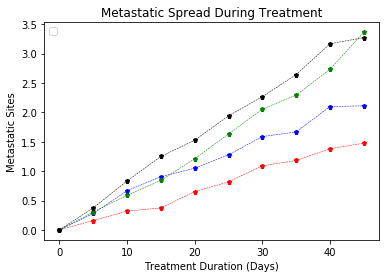

In [61]:
# Generate the Plot (with Error Bars)


plt.errorbar(metastatic_response_df2.index, metastatic_response_df2['Capomulin'],
             color='r', marker='p', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_df2.index, metastatic_response_df2['Infubinol'],
             color='b', marker='p', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_df2.index, metastatic_response_df2['Ketapril'],
             color='g', marker='p', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_df2.index, metastatic_response_df2['Placebo'],
             color='black', marker='p', markersize=5, linestyle='--', linewidth=0.5)

# Chart title
plt.title("Metastatic Spread During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Metastatic Sites")
# legend 
plt.legend(loc='upper left')
plt.show()
# Save the Figure

# Show the Figure


## Survival Rates

In [58]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate_df = drug_test[['Drug', 'Timepoint', 'Mouse ID']]

# Convert to DataFrame
survival_rate_df = survival_rate_df.set_index(['Drug', 'Timepoint'])
survival_rate_df.head()
# Preview DataFrame


Mouse ID
Drug     Timepoint         
Stelasyn 0             f234
         5             f234
         10            f234
         15            f234
         20            f234

In [59]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate_df['Mouse Count'] = survival_rate_df.groupby(['Drug','Timepoint']).count()['Mouse ID']

# Preview the Data Frame
survival_rate_pivot = survival_rate_df.pivot_table(index='Timepoint',columns='Drug',values='Mouse Count')  
survival_rate_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


No handles with labels found to put in legend.


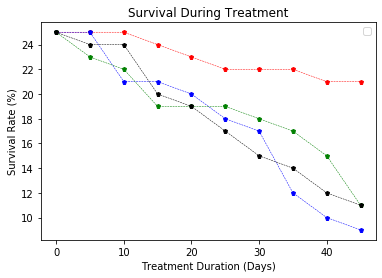

In [62]:
# Generate the Plot (Accounting for percentages)
# Create scatter plot to show the survival rate of mice through the course of treatment
plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Capomulin'], 
             color='r', marker='p', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Infubinol'], 
             color='b', marker='p', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Ketapril'], 
             color='g', marker='p', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Placebo'], 
             color='black', marker='p', markersize=5, linestyle='--', linewidth=0.5)

# Chart title
plt.title("Survival During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Survival Rate (%)")
# legend 
plt.legend(loc='upper right')
plt.show()
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [64]:
# Calculate the percent changes for each drug
tumor_volume_change_percentage =  ((tumor_response_pivot.iloc[-1]-tumor_response_pivot.iloc[0])/tumor_response_pivot.iloc[0]) * 100
tumor_volume_change_percentage
# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

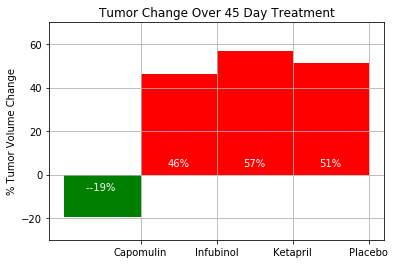